In [42]:
DBSCAN — это алгоритм кластеризации данных, который предложили Маритин Эстер, Ганс-Петер Кригель, Ёрг Сандер и Сяовэй Су в 1996. 
Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, 
которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях 
с малой плотностью (ближайшие соседи которых лежат далеко). DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации, 
и наиболее часто упоминается в научной литературе.

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [44]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.4, random_state=987, shuffle=False)
print(X.shape)

(1000, 2)


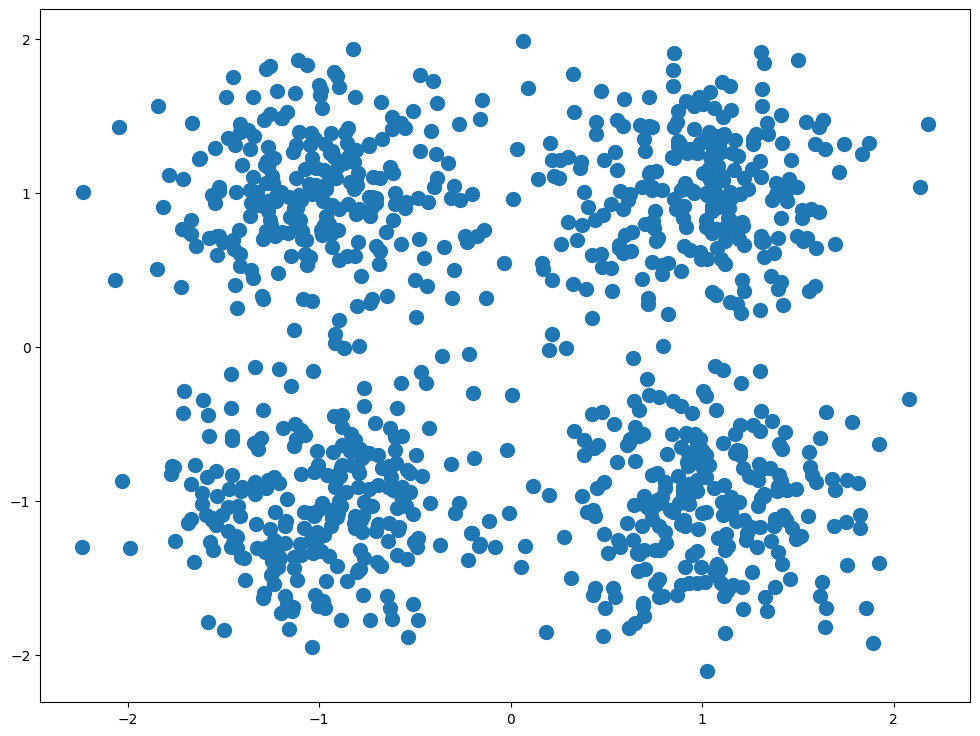

In [45]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [46]:
X_scaled = StandardScaler().fit_transform(X)

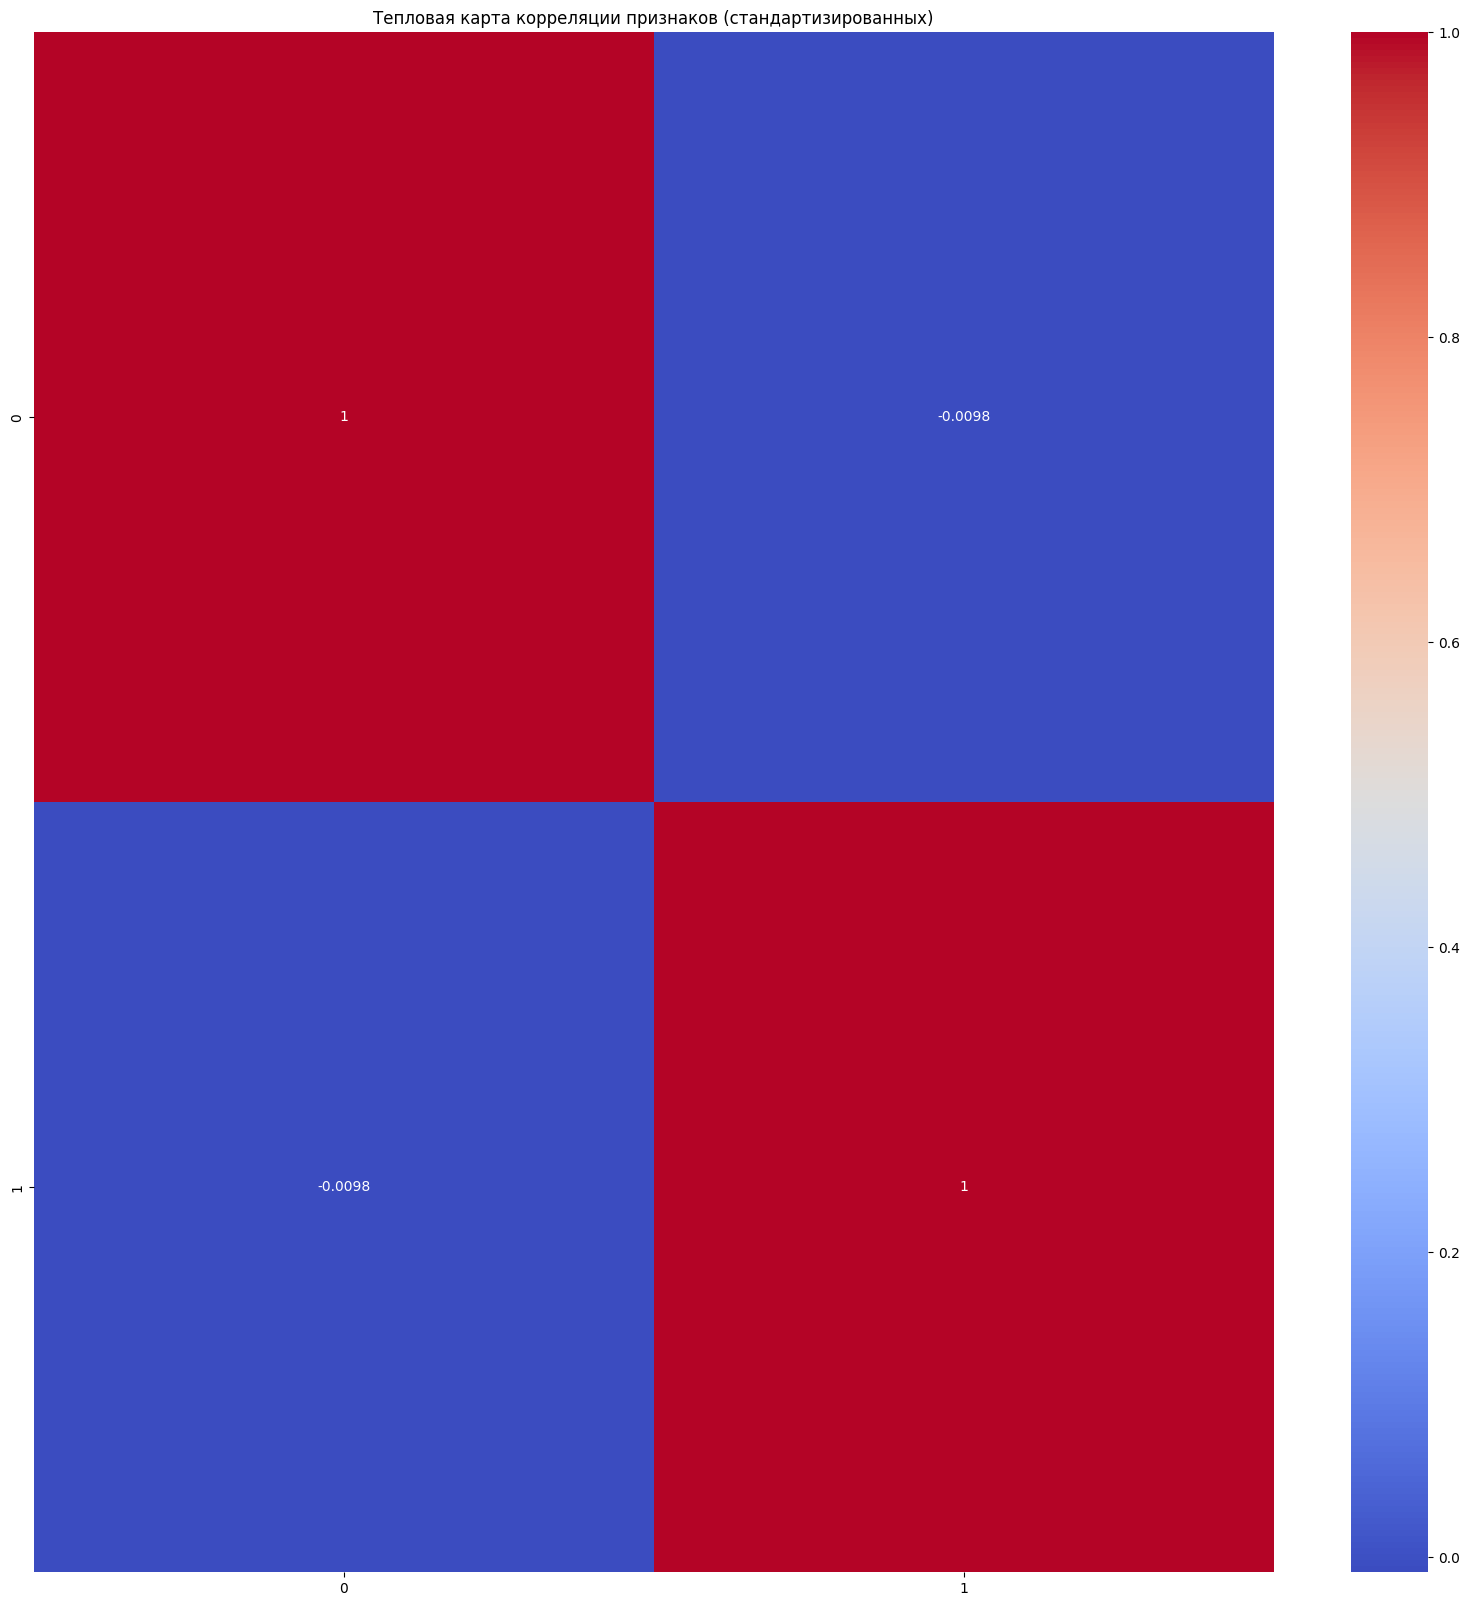

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции признаков (стандартизированных)")
plt.show()

In [48]:
dbscan1 = DBSCAN().fit_predict(X_scaled)

In [49]:
print(dbscan1)
unique_labels = set(dbscan1)
print(f"Sets: {unique_labels}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

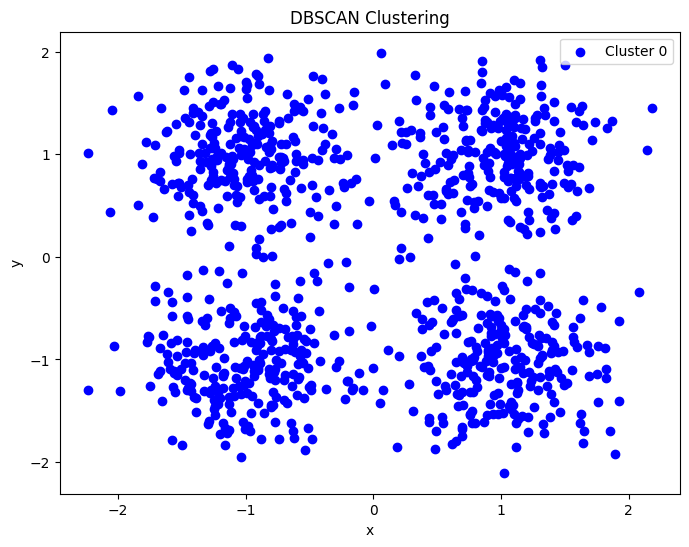

In [50]:
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for class_label in np.unique(dbscan1):
    X_class = X[dbscan1 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [51]:
dbscan2 = DBSCAN(eps=0.3, min_samples=30, metric='euclidean').fit_predict(X_scaled)

In [52]:
print(dbscan2)
unique_labels2 = set(dbscan2)
print(f"Sets: {unique_labels2}")

[-1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  1  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  2  2  2  2  2 -1  2  2  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2
  2  2  2 -1  2 -1  2  2  2  2 -1  2  2 -1  2  2  2

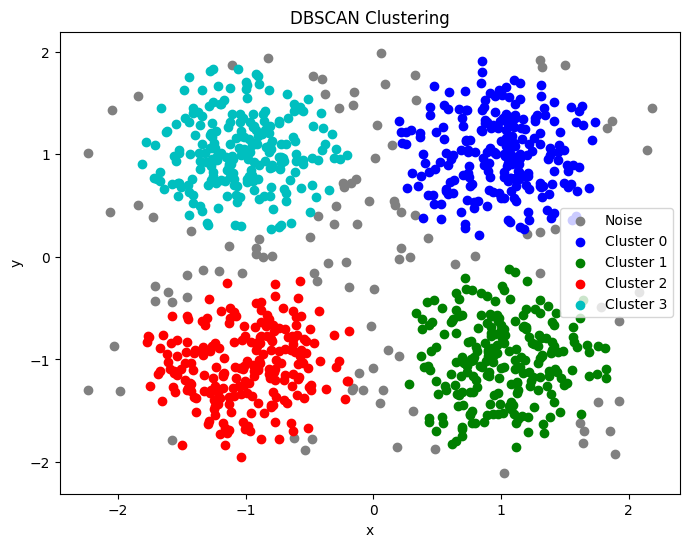

In [53]:
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for class_label in np.unique(dbscan2):
    X_class = X[dbscan2 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

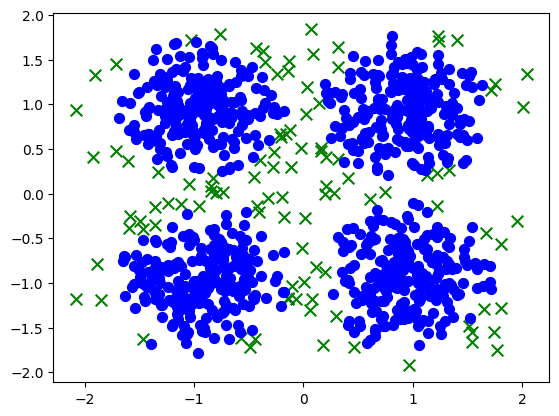

In [54]:
plt.scatter(X_scaled[dbscan2==-1, 0], X_scaled[dbscan2==-1, 1], c='green', s=70, marker='x')
plt.scatter(X_scaled[dbscan2!=-1, 0], X_scaled[dbscan2!=-1, 1], c='blue', s=50)
plt.show()

In [55]:
dbscan3 = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit_predict(X_scaled)

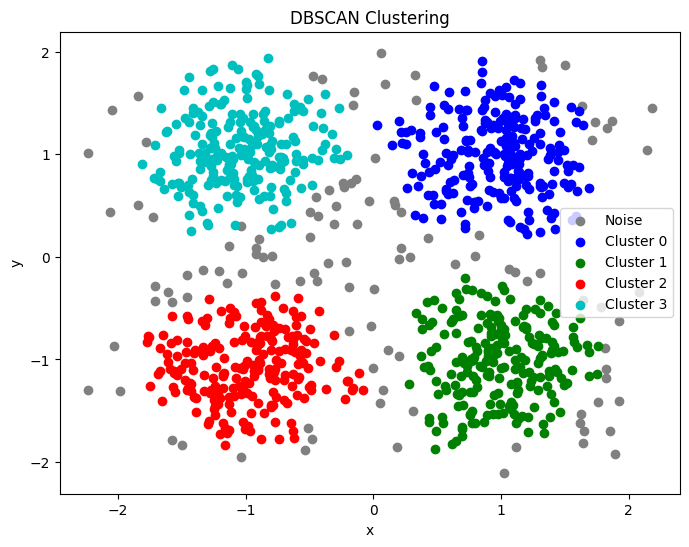

In [56]:
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for class_label in np.unique(dbscan3):
    X_class = X[dbscan3 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

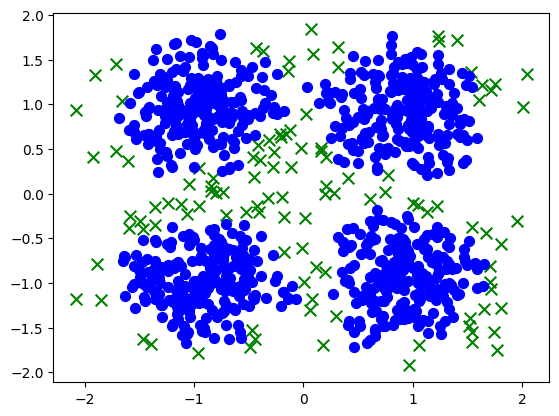

In [57]:
plt.scatter(X_scaled[dbscan3==-1, 0], X_scaled[dbscan3==-1, 1], c='green', s=70, marker='x')
plt.scatter(X_scaled[dbscan3!=-1, 0], X_scaled[dbscan3!=-1, 1], c='blue', s=50)
plt.show()

In [58]:
dbscan4 = DBSCAN(eps=0.15, min_samples=10, metric='euclidean').fit_predict(X_scaled)

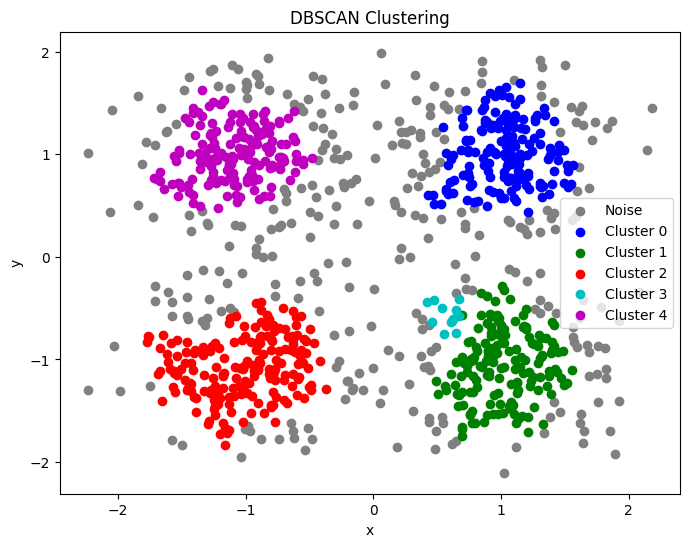

In [59]:
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for class_label in np.unique(dbscan4):
    X_class = X[dbscan4 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

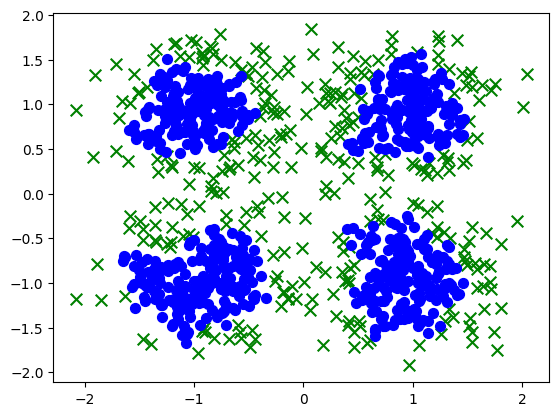

In [60]:
plt.scatter(X_scaled[dbscan4==-1, 0], X_scaled[dbscan4==-1, 1], c='green', s=70, marker='x')
plt.scatter(X_scaled[dbscan4!=-1, 0], X_scaled[dbscan4!=-1, 1], c='blue', s=50)
plt.show()

In [61]:
dbscan5 = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
clusters = dbscan5.fit_predict(X_scaled)

In [62]:
silhouette = silhouette_score(X, clusters)
print(silhouette)

0.5244522571094912


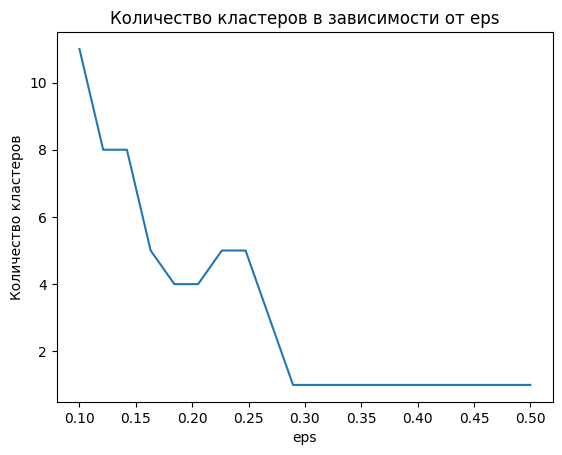

In [63]:
eps_values = np.linspace(0.1, 0.5, 20)
n_clusters = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))

plt.plot(eps_values, n_clusters)
plt.title("Количество кластеров в зависимости от eps")
plt.xlabel("eps")
plt.ylabel("Количество кластеров")
plt.show()